In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# @title
# 補colab中文字體
!apt-get update -y
!apt-get install -y fonts-noto-cjk

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,546 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,245 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/rest

In [ ]:
# @title
# 指定字體檔路徑
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path, size=14)

In [ ]:
# 下載 red wine 資料集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


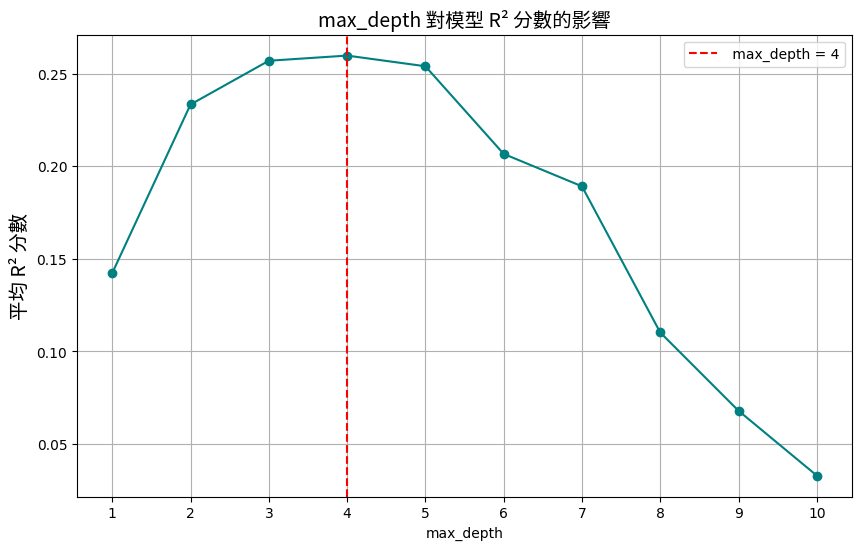

In [ ]:
# 特徵與目標變數
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearchCV 尋找最佳 max_depth
param_grid = {'max_depth': list(range(1, 11))}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# 圖形化
depths = param_grid['max_depth']
mean_scores = grid_search.cv_results_['mean_test_score']
best_depth = grid_search.best_params_['max_depth']

plt.figure(figsize=(10, 6))
plt.plot(depths, mean_scores, marker='o', linestyle='-', color='teal')
plt.axvline(best_depth, color='red', linestyle='--', label=f" max_depth = {best_depth}")
plt.title("max_depth 對模型 R² 分數的影響", fontproperties=font_prop)
plt.xlabel("max_depth")
plt.ylabel("平均 R² 分數", fontproperties=font_prop)
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 建立與訓練模型--決策樹
model = DecisionTreeRegressor(max_depth=best_depth)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
# 預測
y_pred = model.predict(X_test_scaled)

In [ ]:
# 評估指標
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.5169995904805598
MSE: 0.4379717420088509
RMSE: 0.6617943351290119
R²: 0.329812065606086


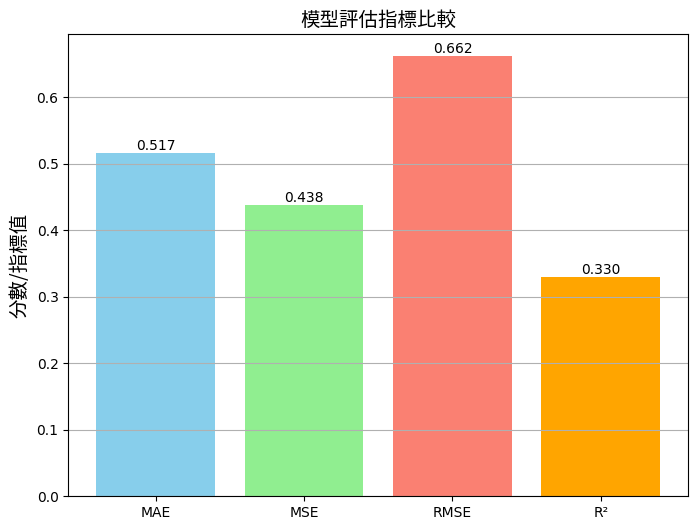

In [ ]:
# 可視化：模型評估指標的長條圖
plt.figure(figsize=(8,6))

# 把4個指標的名稱和數值放進 list
metrics_names = ['MAE', 'MSE', 'RMSE', 'R²']
metrics_values = [mae, mse, rmse, r2]

# 畫長條圖
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

# 在每個柱子上標出數值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')

plt.title('模型評估指標比較', fontproperties=font_prop)
plt.ylabel('分數/指標值', fontproperties=font_prop)
plt.grid(axis='y')
plt.show()
